# EDA Penguins

In this notebook tutorial, we will conduct simple EDA steps on the popular penguins dataset.

In [1]:
import seaborn as sns

### Load the dataset

Dataset source: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Understand the Features

Here is what I found on the internet from: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

- `species` (categorical) is who the penguin belong to (Adelie, Chinstrap, Gentoo)
- `island` (categorical) is where the penguin came from (Biscoe, Dream, Torgersen)
- bill (is the منقار) of the penguin, the thing which he uses to eat
    - `bill_length_mm` (numeric) in milimeters
    - `bill_depth_mm` (numeric) in milimeter
- flipper are their wings
    - `flipper_length_mm` (numeric) in milimeter
- `sex` (categorical) is the gender: Male or Female
- `body_mass_g` (numeric) in grams

#### Penguin Bill

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

## Data Cleaning

#### Technical Dataframe Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


- **missing values**: We notice that there are some missing values in the dataset.
- **categroical types**: `species`, `island`, and `sex` can be converted to `category` data type instead of the current `object` data type.
- **numerical types**: To save memory, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g` can be converted to `float32` instead of `float64`.

We note that features are properly named and don't need renaming or standardization.

#### Missing values

In [5]:
# count missing values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
# percentage of missing values from each column
df.isnull().mean() * 100

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

Since missing values are low in number, we can safely drop them.

In [7]:
df.dropna(inplace=True)

In [8]:
# optionally fill missing values with the mean
# df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)

#### Duplicates

Be sure to drop duplicates if any.

In [9]:
df.drop_duplicates(inplace=True)

#### Data types conversion

- We shall convert the string types to `category` to preserve memory
- we shall also convert `float64 -> float32`

In [10]:
mem_usage_before = df.memory_usage(deep=True)

In [11]:
# convert categotical types
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [12]:
# convert numerical types
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
df['bill_length_mm'] = df['bill_length_mm'].astype('float32')
df['flipper_length_mm'] = df['flipper_length_mm'].astype('float32')
df['body_mass_g'] = df['body_mass_g'].astype('float32')

In [13]:
mem_usage_after = df.memory_usage(deep=True)
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 64 KB


#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

In [14]:
print(df['species'].unique())
print(df['island'].unique())
print(df['sex'].unique())

['Adelie', 'Chinstrap', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']
['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']
['Male', 'Female']
Categories (2, object): ['Female', 'Male']


### Summary data after cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float32 
 3   bill_depth_mm      333 non-null    float32 
 4   flipper_length_mm  333 non-null    float32 
 5   body_mass_g        333 non-null    float32 
 6   sex                333 non-null    category
dtypes: category(3), float32(4)
memory usage: 9.2 KB


In [16]:
(11 / 343) * 100

3.206997084548105

- After cleaning, the dataset was reduced from 343 to 333 rows, a difference of 10 rows
- The drop of sex na values resulted in a reduction of 3.2% of data size
- We imputed the missing numerical values with the mean

#### Dataset Size

In [17]:
df.shape

(333, 7)

## Univariate Analysis

#### Distribution of categorical features

In [18]:
# categorical columns
df.describe(exclude='number').T

,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,Male,168


In [19]:
species = df['species'].value_counts()
island = df['island'].value_counts()
sex = df['sex'].value_counts()

Text(0.5, 0, 'Sex')

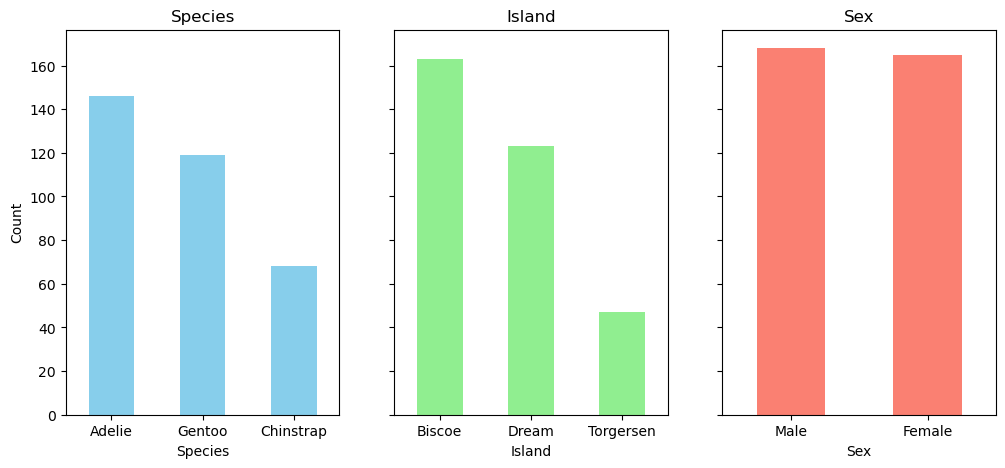

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

species.plot(kind='bar', ax=ax[0], color='skyblue', rot=0)
ax[0].set_title('Species')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Species')

island.plot(kind='bar', ax=ax[1], color='lightgreen', rot=0)
ax[1].set_title('Island')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Island')

sex.plot(kind='bar', ax=ax[2], color='salmon', rot=0)
ax[2].set_title('Sex')
ax[2].set_ylabel('Count')
ax[2].set_xlabel('Sex')

C:\Users\thund\AppData\Local\Temp\ipykernel_17424\1184769405.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


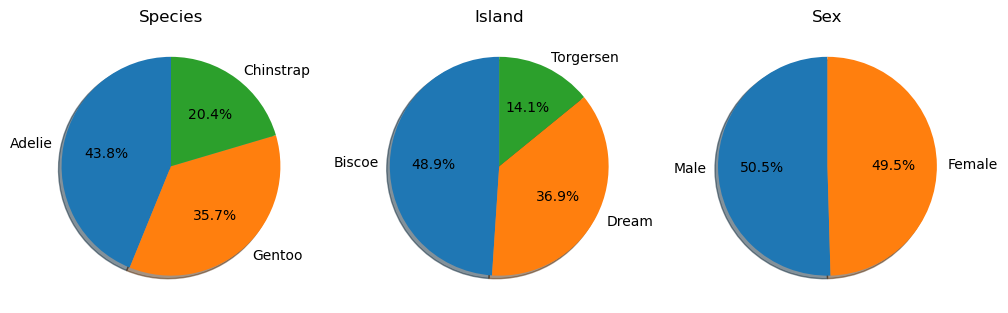

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

species.plot(kind='pie', ax=ax[0], autopct='%1.1f%%', startangle=90, shadow=True)
ax[0].set_title('Species')
ax[0].set_ylabel('')

island.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', startangle=90, shadow=True)
ax[1].set_title('Island')
ax[1].set_ylabel('')

sex.plot(kind='pie', ax=ax[2], autopct='%1.1f%%', startangle=90, shadow=True)
ax[2].set_title('Sex')
ax[2].set_ylabel('')

fig.show()

#### Distribution of numerical features

In [22]:
# numerical columns
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992794,5.468668,32.099998,39.5,44.500000,48.599998,59.599998
bill_depth_mm,333.0,17.164865,1.969235,13.100000,15.6,17.299999,18.700001,21.500000
flipper_length_mm,333.0,200.966965,14.015765,172.000000,190.0,197.000000,213.000000,231.000000
body_mass_g,333.0,4207.057129,805.215820,2700.000000,3550.0,4050.000000,4775.000000,6300.000000


C:\Users\thund\AppData\Local\Temp\ipykernel_17424\71577449.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout() # Or equivalently,  "plt.tight_layout()"


0 bill_length_mm
1 bill_depth_mm
2 flipper_length_mm
3 body_mass_g


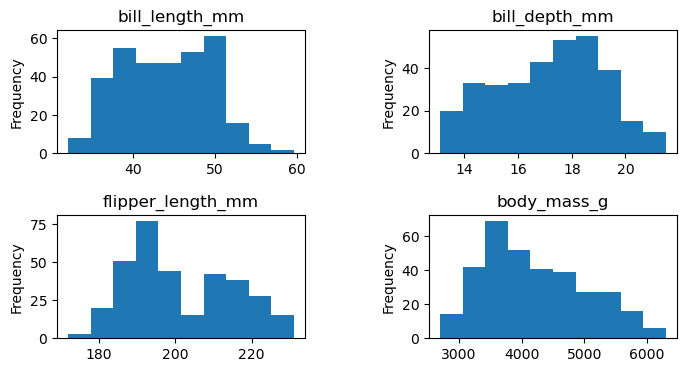

In [23]:
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes('number')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 4), gridspec_kw=dict(hspace=0.5, wspace=0.5))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

for i, col in enumerate(df_numeric.columns):
    print(i, col)
    # df[col].plot.box(ax=axes.flat[i])
    df[col].plot.hist(ax=axes.flat[i])
    axes.flat[i].set_title(col)

plt.show()

## Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

In [24]:
df.select_dtypes(include='number').corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

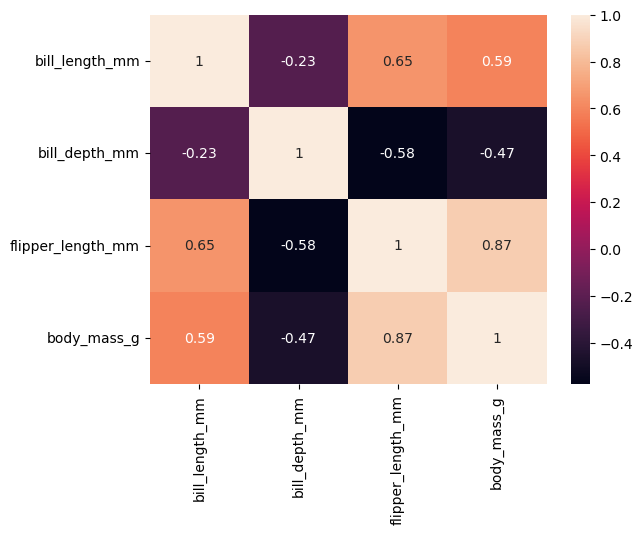

In [25]:
numerical_corr = df.select_dtypes(include='number').corr()
sns.heatmap(numerical_corr, annot=True)

Observations:

1. We notice high correlation between flipper length and body mass (0.87).
2. We also notice high correlation between flipper length and bill length (0.65).
3. There is little correlation between bill depth and bill length (-0.23).

## Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [26]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female
5,Adelie,Torgersen,39.299999,20.600000,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.200001,13.700000,214.0,4925.0,Female
340,Gentoo,Biscoe,46.799999,14.300000,215.0,4850.0,Female
341,Gentoo,Biscoe,50.400002,15.700000,222.0,5750.0,Male
342,Gentoo,Biscoe,45.200001,14.800000,212.0,5200.0,Female


In [27]:
df['bill_size'] = df['bill_length_mm'] * df['bill_depth_mm']
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']

In [28]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_size,bill_ratio
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male,731.169983,2.090909
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female,687.299988,2.270115
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female,725.399963,2.238889
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female,708.309998,1.901554
5,Adelie,Torgersen,39.299999,20.600000,190.0,3650.0,Male,809.580017,1.907767


In [29]:
corr = df.corr(numeric_only=True)

<Axes: >

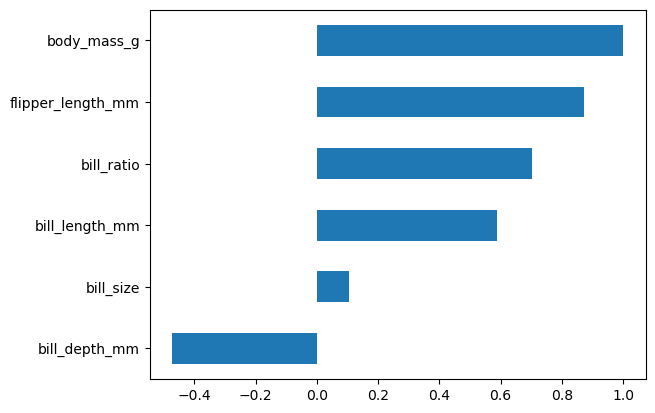

In [30]:
corr['body_mass_g'].sort_values().plot.barh()

<Axes: >

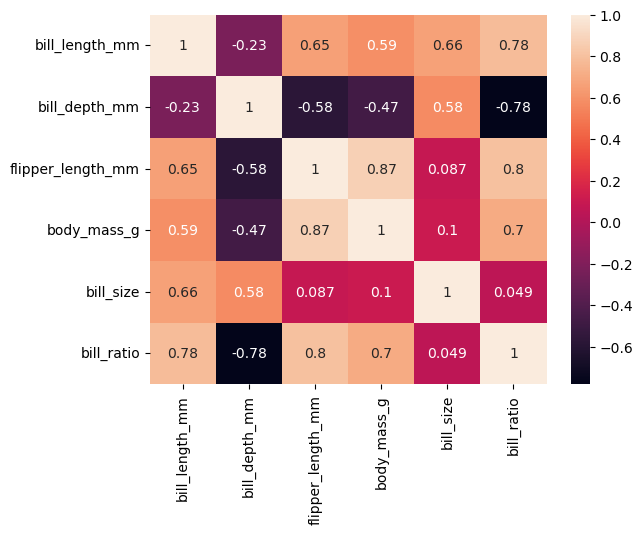

In [31]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Extra

#### Hypothesize and test

We think that penguins may differ in terms of body mass between species, as well as by gender.

A boxplot can be used to verify this hypothesis.

<Axes: xlabel='species', ylabel='body_mass_g'>

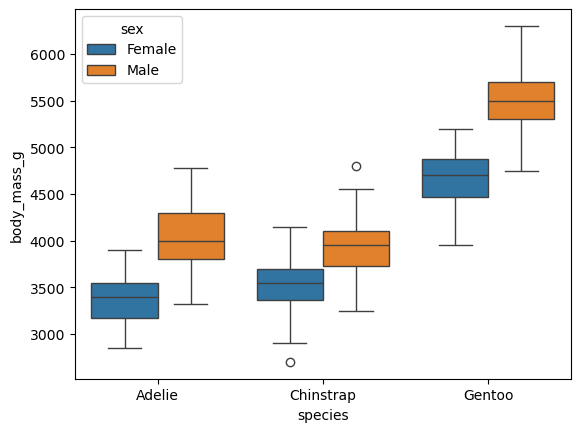

In [32]:
sns.boxplot(data=df, x='species', y='body_mass_g', hue='sex')

Observations:

1. Our assumption seems correct (at least visually); i.e., Gentoo penguins are heavier than Adélie and Chinstrap penguins.
2. We were also right about females' weight. Females are lighter across all species!

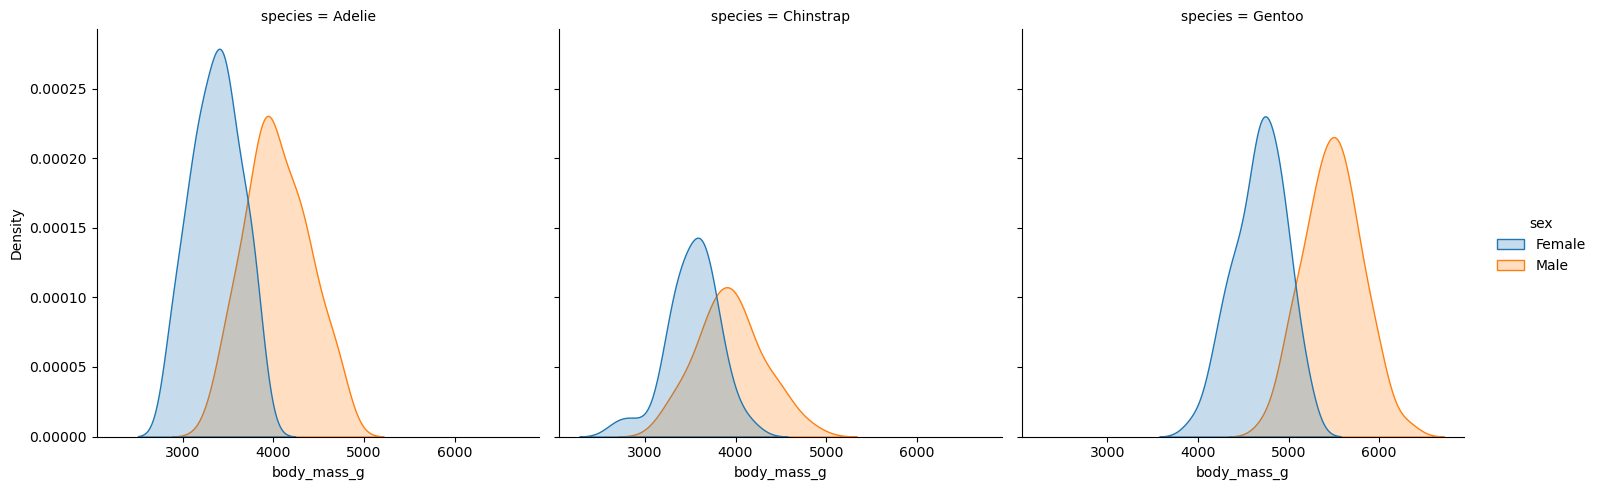

In [38]:
sns.displot(df, kind='kde', x='body_mass_g', hue='sex', col='species', fill=True)

<Axes: xlabel='species', ylabel='body_mass_g'>

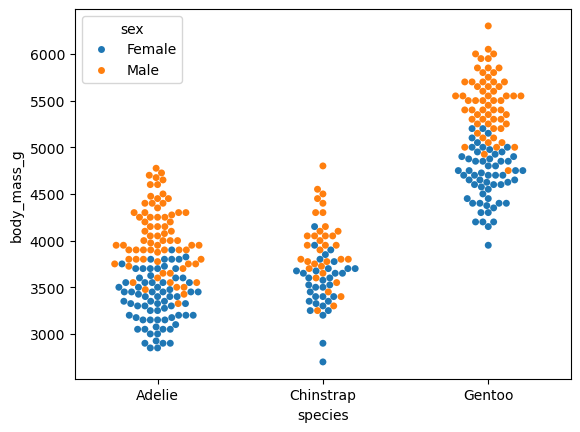

In [44]:
sns.swarmplot(df, y='body_mass_g', x='species', hue='sex')

### Categorical and Categorical

In [46]:
import pandas as pd

cross = pd.crosstab(df['island'], df['species'], normalize=True)
cross

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,0.132132,0.000000,0.357357
Dream,0.165165,0.204204,0.000000
Torgersen,0.141141,0.000000,0.000000


<Axes: xlabel='species', ylabel='island'>

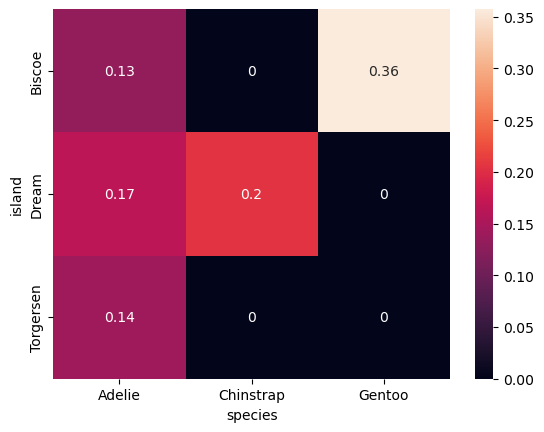

In [ ]:
sns.heatmap(cross, annot=True)

- We can use a heatmap with **correlation matrix** (numerical vs numerical)
    - values range between (-1 and +1)
- We used a heatmap here with **contigency matrix** (categorical vs categorical)
    - values in the entire table sum up to one
    - range is (0 to 1)

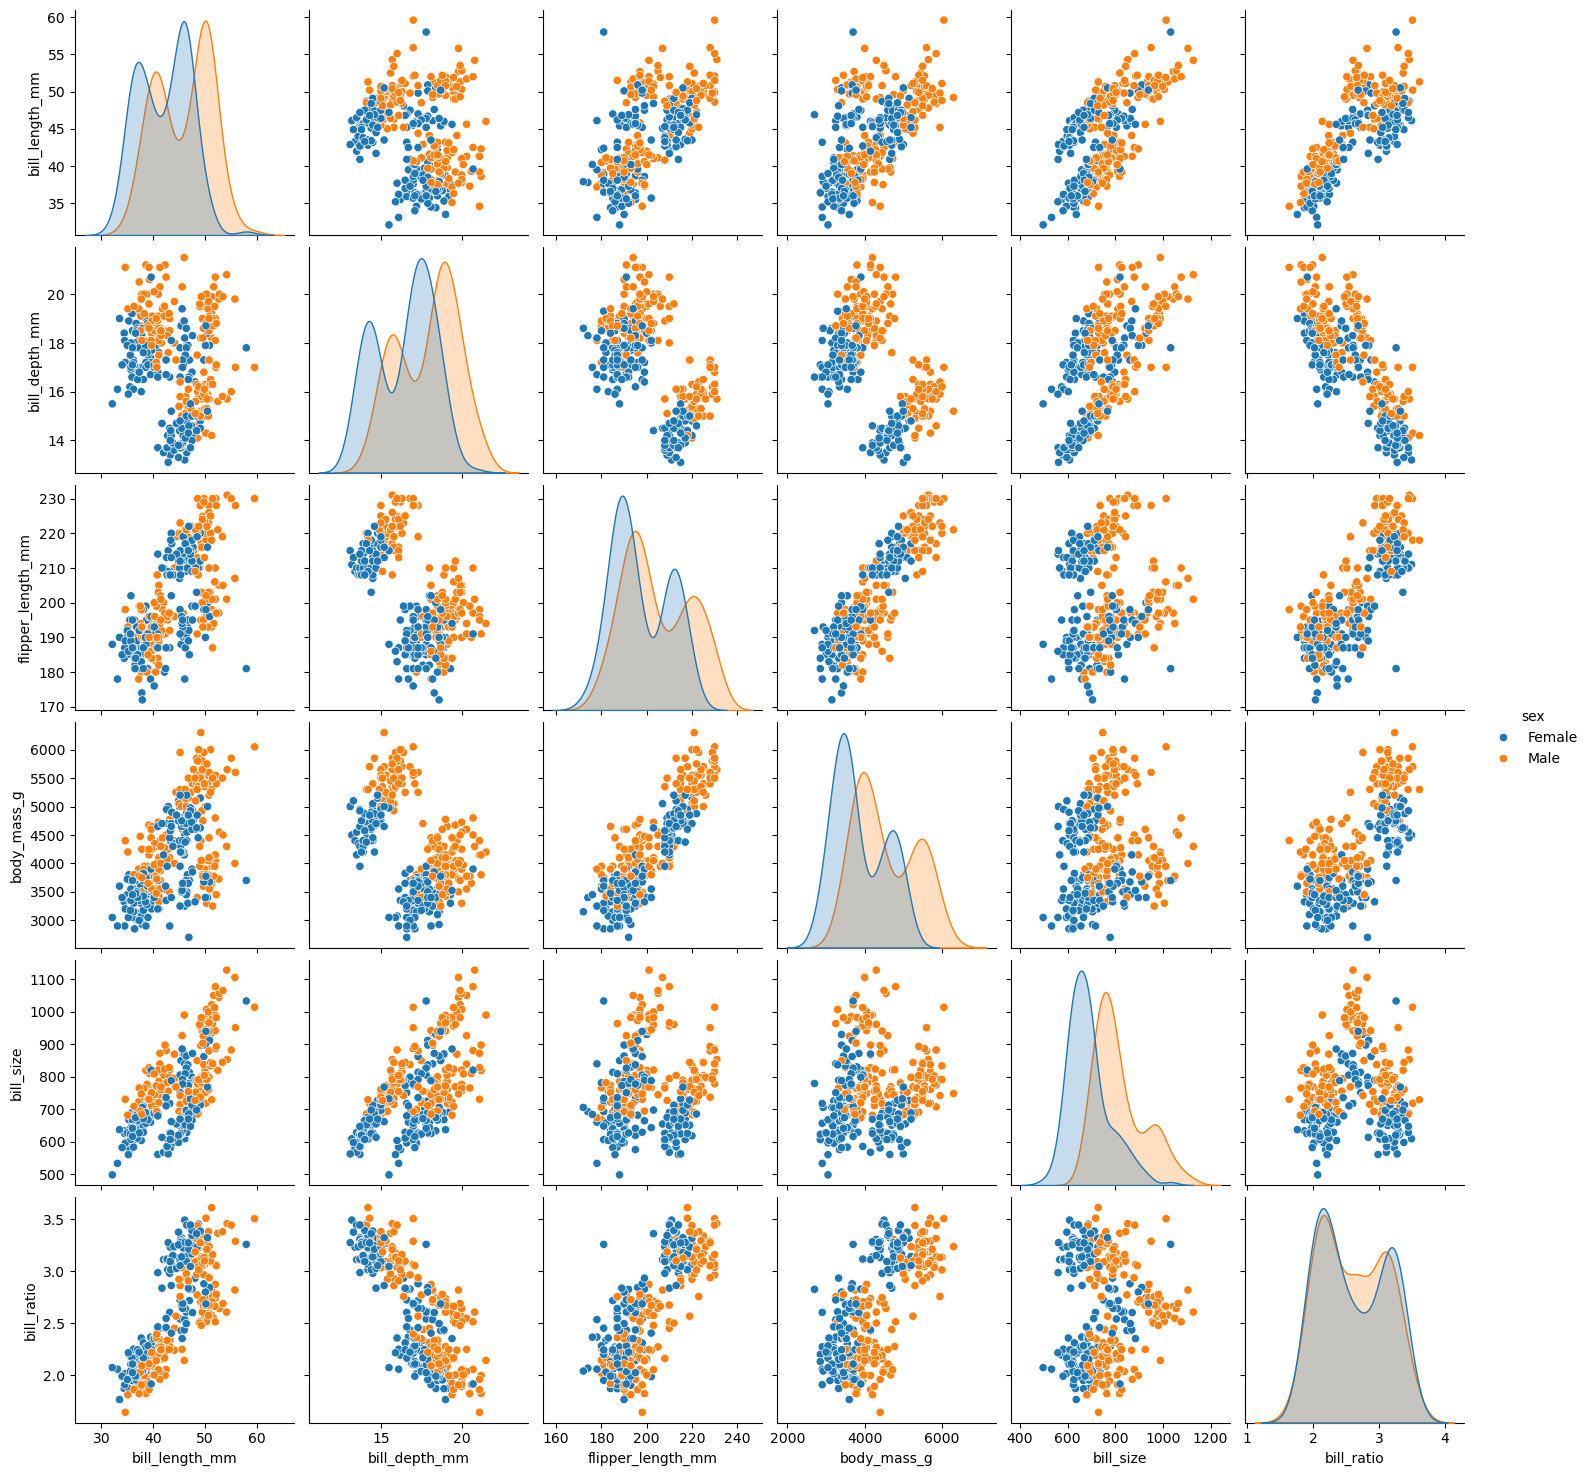

In [47]:
# plot numerical columns
sns.pairplot(df, hue='species')

- Distribution plots can tell us a lot about each species.
- Scatter plots can tell us about the relationship between features.